# Decision Tree & SVM (Support Vector Machine)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [35]:
tree = DecisionTreeClassifier(max_depth=5)
iris = load_iris()
X = iris.data
y = iris.target
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
np.mean(tree.predict(X) == y)

1.0

In [37]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="iris.dot", feature_names=iris.feature_names, 
                class_names=iris.target_names, rounded=True, filled=True, impurity=True)

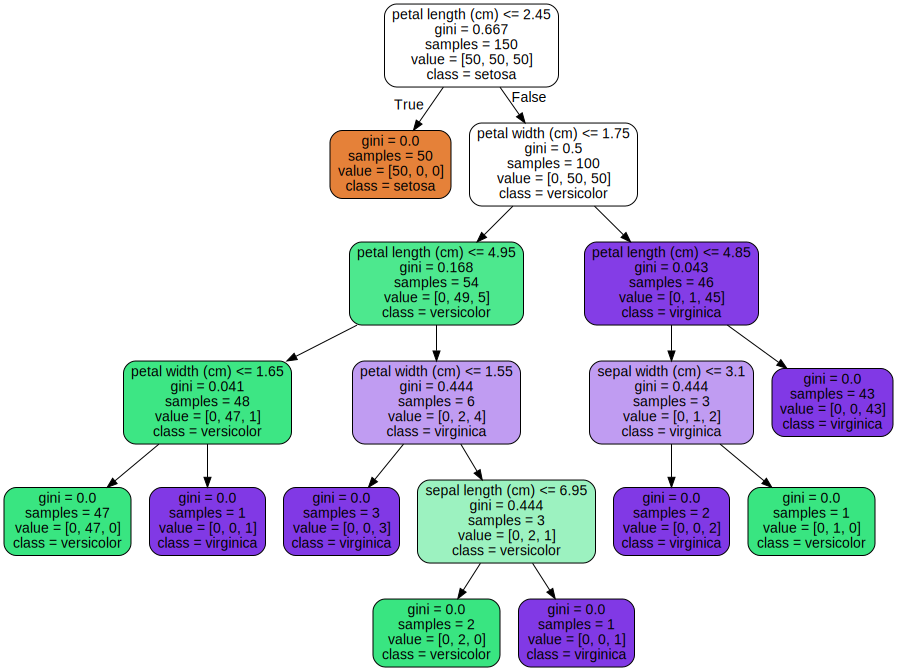

In [38]:
import pydot
import graphviz

graph = pydot.graph_from_dot_file("iris.dot")[0]
with open("iris.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [52]:
## face dataset 업로드
faces_all = fetch_olivetti_faces()

X = faces_all.data
y = faces_all.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

pca = PCA(n_components=50) 
pca.fit(X_train)

lowX_train = pca.transform(X_train)
lowX_test = pca.transform(X_test)

tree = DecisionTreeClassifier(max_depth=40)
tree.fit(lowX_train, y_train)

print(np.mean(tree.predict(lowX_train) == y_train))
print(np.mean(tree.predict(lowX_test) == y_test))

1.0
0.335


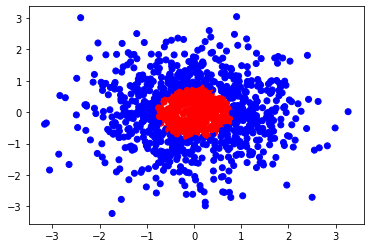

In [54]:
samples = 1000
x_data = np.random.normal(0, 1, size=[samples ,2])
d = np.sqrt([x[0]**2 + x[1]**2 for x in x_data])
y_data = np.array([0 if i < 0.8 else 1 for i in d]).reshape(samples, 1)
colors = ["red" if i == 0 else "blue" for i in y_data]
plt.scatter(x_data[:, 0], x_data[:, 1], color=colors)

In [55]:
log_reg = LogisticRegression()
log_reg.fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

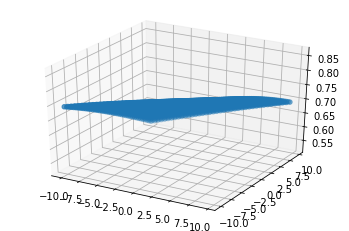

In [56]:
xx, yy = np.mgrid[-10:10:0.5, -10:10:0.5]
grid = np.c_[xx.flatten(), yy.flatten()]

result = log_reg.predict_proba(grid)[:, 1]
fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(xx.flatten(), yy.flatten(), result, 'r')

In [57]:
log_reg.score(x_data, y_data) # np.mean(log_reg.predict(x_data) == y_data)

0.719

In [58]:
log_reg.predict(x_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

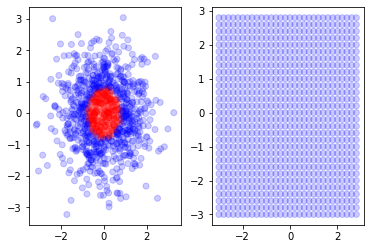

In [59]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)


xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = log_reg.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

## 분류가 제대로 되지 않은 것을 확인 가능

In [68]:
from sklearn.svm import SVC
model = SVC(kernel='poly', degree=2).fit(x_data, y_data)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


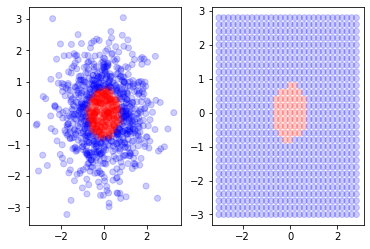

In [71]:
plt.subplot(1,2,1)  
colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=0.2)

xx, yy = np.mgrid[-3.0:3:0.2, -3.0:3.0:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
plt.subplot(1,2,2)  

colors = ["red"  if i == 0  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)

## SVM을 통해 비선형 문제를 해결함

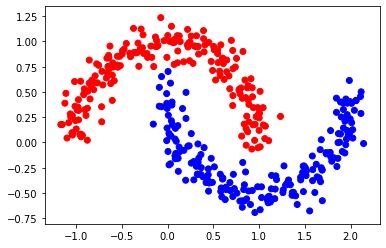

In [119]:
from sklearn.datasets import make_moons
x_data, y_data = make_moons(n_samples=400, noise=0.1, random_state=0)

colors = ["red"  if i == 0  else  "blue"  for i  in y_data]
plt.scatter(x_data[:, 0], x_data[:, 1], color = colors, alpha=1)

In [110]:
model = SVC(kernel='rbf', degree=4).fit(x_data, y_data)

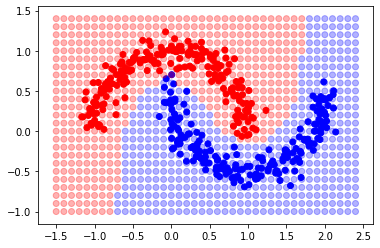

In [111]:
colors = ["red" if i  == 0 else "blue" for i in y_data]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1)

xx, yy = np.mgrid[-1.5:2.5:0.1, -1:1.5:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]

p = model.predict(grid)
colors = ["red" if i == 0 else "blue" for i in p]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.3)

In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3) ## 차원 확대

poly.fit([[2, 6]])
print(poly.transform([[2, 6]]))

[[  1.   2.   6.   4.  12.  36.   8.  24.  72. 216.]]


In [126]:
poly.fit(x_data)
print(x_data.shape)

(400, 2)


In [127]:
X2 = poly.transform(x_data)
print(X2.shape)

(400, 10)


In [128]:
log_reg = LogisticRegression()
log_reg.fit(X2, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

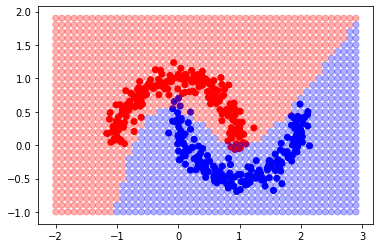

In [130]:
colors = ["red" if i  == 0 else "blue" for i in y_data]
plt.scatter(x_data[:,0], x_data[:,1], color=colors,alpha=1)

xx, yy = np.mgrid[-2:3:0.1, -1:2:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
grid = poly.transform(grid)
p = log_reg.predict(grid)

colors = ["red" if i == 0 else "blue" for i in p]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.3)